In [87]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [88]:
csv = pd.read_csv("../Data/iris.csv")

In [89]:
csv_data = csv[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
csv_label = csv['Name']

In [90]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label, stratify=csv_label)

In [91]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.9736842105263158

In [92]:
# SVM
from sklearn.svm import SVC
clf=SVC()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.9736842105263158

In [93]:
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
clf = GaussianProcessClassifier()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.9736842105263158

In [94]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.868421052631579

In [95]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.9210526315789473

In [96]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.9210526315789473

In [97]:
# Neural Net
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.9736842105263158

In [98]:
# Naive Bayes - 스팸 메일, 문장만들기(채팅할 때 자동완성??)
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.9473684210526315

In [99]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf=QuadraticDiscriminantAnalysis()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

1.0

- 함수 만들어서 돌리자: 머신러닝에 꼭 필요한 기능 - k-fold 교차검증 꼭 필요하다. 그래서 위에 머신러닝들은 쓸 수 없다.

---
### 농구 선수의 게임 데이터를 활용한 포지션 예측을 위한 데이터 정제
NBA 농구 선수들의 게임 기록을 데이터로 사용해서 특정 농구 선수의 포지션을 예측

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns


In [101]:
df = pd.read_csv("../Data/basketball.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


- Pos : 포지션 (SG : Shooting Guard, C : Center)    
- 3P : 한 경기당 평균 3점슛 성공 횟수   
- 2P : 한 경기당 평균 2점슛 성공 횟수   
- TRB : 한 경기당 평균 리바운드 성공 횟수   
- AST : 한 경기당 평균 어시스트 성공 횟수   
- STL : 한 경기당 평균 스틸 성공 횟수   
- BLK : 한 경기당 평균 블로킹 성공 횟수 

In [102]:
df['Pos'].unique()

array(['SG', 'C'], dtype=object)

In [103]:
# 빈도수
df['Pos'].value_counts()

SG    50
C     50
Name: Pos, dtype: int64

### 포지션 별 내용
- C: Center는 포스트(골대) 근처에서 슛을 블로킹하고, 리바운드하며, 바깥으로 쳐내며, 골대 근처에서 2점 슛으로 득점 한다.
- SG : Shooting Guard는 코트 내에서 3점 슛 등 장거리에서 슛을 해서 점수를 얻는 역할.


- 데이터 시각화

In [104]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

# 스틸, 2점슛 시각화

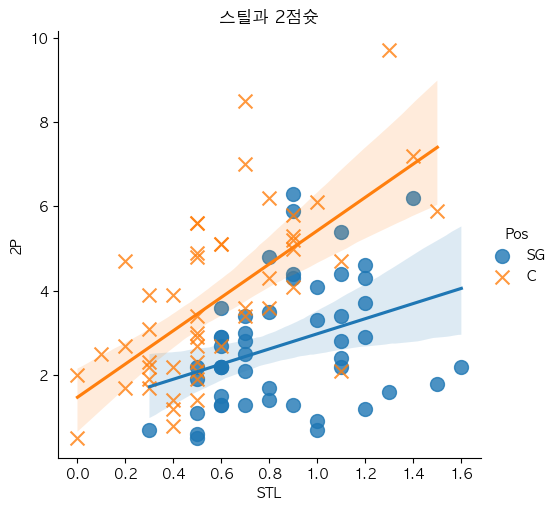

In [105]:
sns.lmplot(x = 'STL', y = '2P',
           data=df,
           fit_reg = True,     # 회기선
           scatter_kws = {'s':100},  # 좌표상의 점의 크기
           markers=['o','x'],
           hue='Pos'    # 대상값
)

plt.title('스틸과 2점슛')
plt.show()

### 어시스트, 2점슛

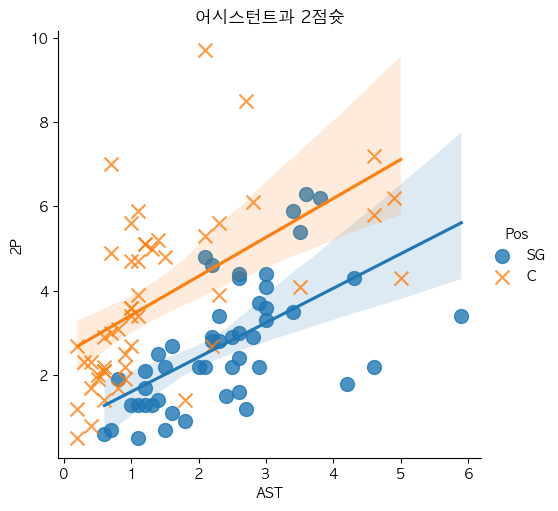

In [106]:
sns.lmplot(x = 'AST', y = '2P',
           data=df,
           fit_reg = True,     # 
           scatter_kws = {'s':100},  # 좌표상의 점의 크기
           markers=['o','x'],
           hue='Pos'    # 대상값
)

plt.title('어시스턴트과 2점슛')
plt.show()

### 블로킹과 3점슛

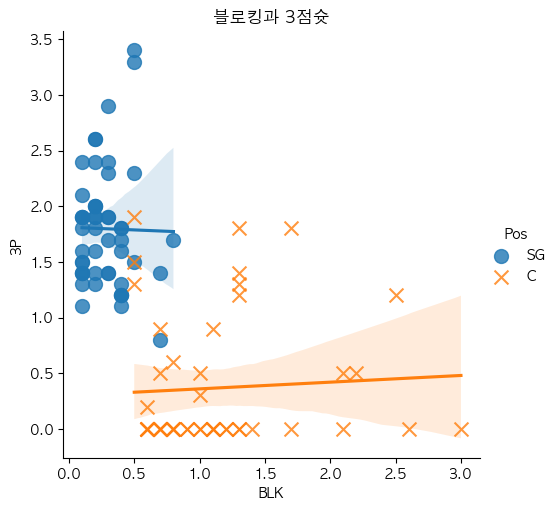

In [107]:
sns.lmplot(x = 'BLK', y = '3P',
           data=df,
           fit_reg = True,     # 
           scatter_kws = {'s':100},  # 좌표상의 점의 크기
           markers=['o','x'],
           hue='Pos'    # 대상값
)

plt.title('블로킹과 3점슛')
plt.show()

### 리바운드와 3점슛

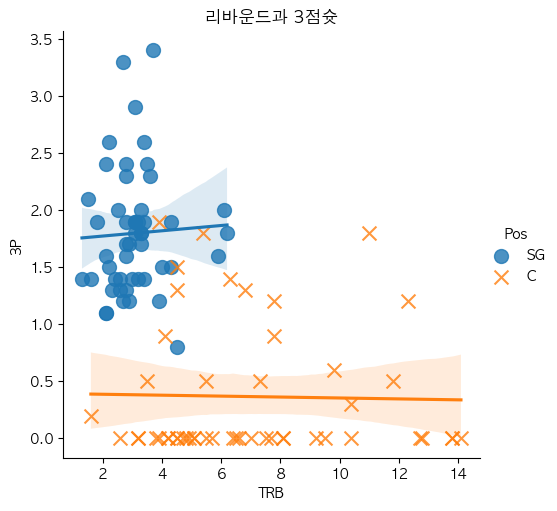

In [108]:
sns.lmplot(x = 'TRB', y = '3P',
           data=df,
           fit_reg = True,     # 회기선 그려줌
           scatter_kws = {'s':100},  # 좌표상의 점의 크기
           markers=['o','x'],
           hue='Pos'    # 대상값
)

plt.title('리바운드과 3점슛')
plt.show()

### 데이터 다듬기
- 분별력이 없는 Feature를 데이터에서 제거
- 시각화를 통해 확인해 본 결과 2P, AST, STL은 분별력이 없다

In [109]:
# feature 컬럼 확인할 수 있다.
df.drop(['2P', 'AST','STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


### 학습 데이터와 검증 데이터로 나누기

In [110]:
from sklearn.model_selection import train_test_split

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류 합니다.
train, test = train_test_split(df, test_size=0.2)       # test data 20%만 가져오기

In [111]:
# train, test data 확인
train.shape

(80, 5)

In [112]:
test.shape

(20, 5)

In [113]:
# 데이터 저장하기
train.to_csv("../Data/basketball_train.csv", index=False)
test.to_csv("../Data/basketball_test.csv", index=False)